In [1]:
#Please execute this cell
import sys;
sys.path.append('../../../'); 
import jupman;

# Exam -  Wed 31, Aug 2022

**Scientific Programming - Data Science Master @ University of Trento**

## [Download exercises and solutions](../../../_static/generated/sciprog-ds-2022-08-31-exam.zip) 

<div class="alert alert-warning">
    
**NOTICE: this part of the exam was** [ported to softpython](https://en.softpython.org/projects/iching/iching-sol.html) **website**
    
There you can find a more curated version (notice it may be longer than here)
</div>    

# Part A - I CHING Divination (32 points)


The I Ching or Book of Changes, is a chinese divination manual and one of the world's oldest books, dating from over 3,000 years ago. The great mathematician Gottfried Wilhelm Leibniz (1646 - 1716) is considered the first information theorist, and extensively documented the binary numeral system. Leibniz was also interested in Chinese culture, and [saw in the I Ching](https://en.wikipedia.org/wiki/Gottfried_Wilhelm_Leibniz#Sinophile) diagrams showing solid and broken lines called yin and yang, which progressed in a sequence: that was unmistakably a binary encoding.  You will parse a dataset of hexagrams and develop a divinator software which will predict the outcome of your exam. Open Jupyter and start editing this notebook `exam-2022-08-31.ipynb`

Data source: [Wikipedia, July 2021, Bagua page](https://en.wikipedia.org/wiki/Bagua)

## The dataset

**Yin and yang**: Yin and yang are represented by lines: 

|name|line|bit|
|----|-----|---|
|yin |`- -`| 0 |
|yang|`---`| 1 |

**Trigrams**: Different constructions of three yin and yang lines lead to 8 trigrams. We can express a trigram as a sequence of bits, reading lines from bottom to top. For example _Fire_ is `101`, _Thunder_ is `100`.

![iching-lookup-table-header.png](img/iching-lookup-table-header.png)

**Hexagrams**: Combining a lower trigram with an upper trigram leads to 64 hexagrams. Each hexagram can be represented as a sequence of bits and the outcome of a divination. For example trigrams _Fire_ (lower) and _Thunder_ (upper) gives outcome hexagram _Abounding_: `101100`

![iching-lookup-table.png](img/iching-lookup-table.png)

## 1. load_db  (14 points)

Parse [iching.csv](iching.csv) and output a dictionary mapping each sequence to a dictionary with all the information you can extract. Use CSV reader.

- in headers and first column you will find a bit sequence like `011`
- in body cells, you will **not** find a bit sequence: you will have to determine it according to the corresponding tri-sequences from the header and first column
- note for hexagrams you must extract **only** `name-en`, ignore the decimal numbers

**Example** (complete output is in file [expected_iching_db.py](expected_iching_db.py)):

```python
>>> load_db('iching.csv')
{
    '111': {'name-en': 'Heaven', 'name-ch': '乾', 'spelling': 'Qián'}
    '000': {'name-en': 'Earth', 'name-ch': '坤', 'spelling': 'Kūn'}
    '100': {'name-en': 'Thunder', 'name-ch': '震', 'spelling': 'Zhèn'}
    '010': {'name-en': 'Water', 'name-ch': '坎', 'spelling': 'Kǎn'}
    '001': {'name-en': 'Mountain', 'name-ch': '艮', 'spelling': 'Gèn'}
    '011': {'name-en': 'Air', 'name-ch': '巽', 'spelling': 'Xùn'}
    '101': {'name-en': 'Fire', 'name-ch': '離', 'spelling': 'Lí'}
    '110': {'name-en': 'Lake', 'name-ch': '兌', 'spelling': 'Duì'}
 '111111': {'name-en': 'Force'}
 '111000': {'name-en': 'Pervading'}
 '111100': {'name-en': 'Great Invigorating'}
 '111010': {'name-en': 'Attending'}
 '111001': {'name-en': 'Great Accumulating'}
 '111011': {'name-en': 'Small Harvest'}
 '111101': {'name-en': 'Great Possessing'}
     .
     .
}
```

In [2]:
import csv

def load_db(filepath):
    #jupman-raise
    with open(filepath, encoding='utf-8', newline='') as f:        
        my_reader = csv.reader(f, delimiter=',')
        header = next(my_reader)    
        ret = {}
        
        linear = []
        
        for s in header[1:]:
            diz = {}
            tokens = s.split('\n')
            tks = tokens[0].split('\xa0')
            diz['name-en'] = tokens[2] 
            diz['name-ch'] = tks[0]
            diz['spelling'] = tks[1]
            code = tokens[1]
            ret[code] = diz
            linear.append(code)
            
        i = 1
        for row in my_reader:                                
            for j in range(1,len(row)):                
                tokens = row[j].replace('\n','').split()
                num = int(tokens[0])
                bottom = linear[i-1]
                upper = linear[j-1]
                ret[bottom + upper] = {
                    'name-en':' '.join(tokens[1:])
                }
            i += 1            
        return ret
    #/jupman-raise

iching_db = load_db('iching.csv')   
iching_db
#jupman-purge
import sys
sys.path.append('../../')
import jupman
jupman.save_py('expected_iching_db.py', iching_db)
#/jupman-purge

In [3]:
#jupman-purge-io
print('EXERPT:\n')
print('{', end='')
for k,v in list(iching_db.items())[:15]: print("'%s': %s" % (k,v), end='\n ')
print('    .', end='\n ')
print('    .')
print('}')

EXERPT:

{'111': {'name-en': 'Heaven', 'name-ch': '乾', 'spelling': 'Qián'}
 '000': {'name-en': 'Earth', 'name-ch': '坤', 'spelling': 'Kūn'}
 '100': {'name-en': 'Thunder', 'name-ch': '震', 'spelling': 'Zhèn'}
 '010': {'name-en': 'Water', 'name-ch': '坎', 'spelling': 'Kǎn'}
 '001': {'name-en': 'Mountain', 'name-ch': '艮', 'spelling': 'Gèn'}
 '011': {'name-en': 'Air', 'name-ch': '巽', 'spelling': 'Xùn'}
 '101': {'name-en': 'Fire', 'name-ch': '離', 'spelling': 'Lí'}
 '110': {'name-en': 'Lake', 'name-ch': '兌', 'spelling': 'Duì'}
 '111111': {'name-en': 'Force'}
 '111000': {'name-en': 'Pervading'}
 '111100': {'name-en': 'Great Invigorating'}
 '111010': {'name-en': 'Attending'}
 '111001': {'name-en': 'Great Accumulating'}
 '111011': {'name-en': 'Small Harvest'}
 '111101': {'name-en': 'Great Possessing'}
     .
     .
}


In [4]:
# EXECUTE FOR TESTING
from pprint import pformat; from expected_iching_db import expected_iching_db
for seq in expected_iching_db.keys():
    if seq not in iching_db: print('\nERROR: MISSING sequence', seq); break    
    for k in expected_iching_db[seq]:
        if k not in iching_db[seq]:
            print('\nERROR at sequence', seq,'\n\n   MISSING key:', k); break    
        if expected_iching_db[seq][k] != iching_db[seq][k]:
            print('\nERROR at sequence', seq, 'key:',k)
            print('  ACTUAL:\n', pformat(iching_db[seq][k]))
            print('  EXPECTED:\n', pformat(expected_iching_db[seq][k]))
            break

## 2. divine (10 points)

A divination is done by flipping 3 coins to determine the bottom trigram (**bottom up order**), flipping other three coins for the upper trigram (again **bottom up order**), and then the union gives the resulting hexagram. Write a function that PRINTS the process as in the example and RETURNS a string of bits representing the resulting hexagram

**HINT**: to flip coins use `random.randint(0,1)`

**Example**: 



```python
>>> divination = divine(iching_db, "Will I pass the exam?")
>>> print("\nRETURNED:", divination)
```
```
Dear stranger, welcome to SCIPROG I CHING 易經 DIVINATOR

Tell me your question...

        Will I pass the exam?

The coin says 'heads' : we get a yang ---
The coin says 'tails' : we get a  yin - -
The coin says 'heads' : we get a yang ---

The sacred bottom trigram is:

Fire

   ---
   - -
   ---

The coin says 'heads' : we get a yang ---
The coin says 'tails' : we get a  yin - -
The coin says 'tails' : we get a  yin - -

The sacred upper trigram is:

Thunder

   - -
   - -
   ---

The final response hexagram is...

Abounding

   - -
   - -
   ---
   ---
   - -
   ---

RETURNED: 101100
```

In [5]:
#jupman-purge-output
import random

def divine(iching, question):
    
    #THE SEED DETERMINES FOLLOWING randint RESULTS
    random.seed(109)      # Abounding
                          # Thunder  
                          # Fire
        
    #IMPORTANT: try also this seed to check lines visualization order
    #random.seed(1)                                  
    #
    # Infiltrating 001011
    # Air        ---
    #            ---
    #            - -
    # Mountaion  ---
    #            - -
    #            - -            
    
    #jupman-raise
    print()
    print("Dear stranger, welcome to SCIPROG I CHING 易經 DIVINATOR")
    print()
    print("Tell me your question...")
    print()    
    print('       ', question)
    print()
    
    def get_trigram(part):
        lst = []
        stack = []
        for i in range(3):
            r = random.randint(0,1)
            kind = 'yang' if r else ' yin'
            line = '---' if r else '- -'
            coin = "'heads'" if r else "'tails'"
            print('The coin says', coin, ': we get a', kind, line)
            stack.append(line)
            lst.append(str(r))
        stack.reverse()
        digits = ''.join(lst)
        print()    
        print("The sacred", part, "trigram is:",)
        print()    

        print(iching[digits]['name-en'])
        print()
        print('   ' + '\n   '.join(stack))
            
        return (stack, ''.join(lst))
    
    bottom = get_trigram('bottom')
    print()
    upper = get_trigram('upper')        
            
    print()
    print('The final response hexagram is...')
    print()
    print(iching[bottom[1] + upper[1]]['name-en'])
    print()
    print('   ' + '\n   '.join(upper[0] + bottom[0]))
        
    return bottom[1] + upper[1]
    #/jupman-raise

divination = divine(iching_db, "Will I pass the exam?")
print("\nRETURNED:", divination)


Dear stranger, welcome to SCIPROG I CHING 易經 DIVINATOR

Tell me your question...

        Will I pass the exam?

The coin says 'heads' : we get a yang ---
The coin says 'tails' : we get a  yin - -
The coin says 'heads' : we get a yang ---

The sacred bottom trigram is:

Fire

   ---
   - -
   ---

The coin says 'heads' : we get a yang ---
The coin says 'tails' : we get a  yin - -
The coin says 'tails' : we get a  yin - -

The sacred upper trigram is:

Thunder

   - -
   - -
   ---

The final response hexagram is...

Abounding

   - -
   - -
   ---
   ---
   - -
   ---

RETURNED: 101100


## 3. plot_divination (8 points)

Given a divination as a string of bits, plot the divination. First draw the lines, then the rest if you have time. Make it fancy with these [examples](https://spex.altervista.org/server/softpython-en/visualization/visualization1-sol.html#Fancy-plots). To center text you can use these parameters: `ha='center', va='center'`

![expected-plot-Will-I-pass-programming-exam-101100.png](expected-plot-Will-I-pass-sciprog-exam-101100.png)

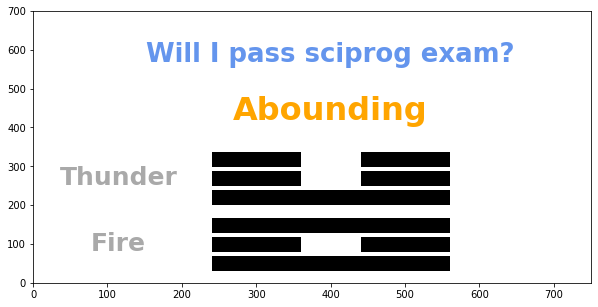

In [6]:
#jupman-purge-output
%matplotlib inline
import matplotlib.pyplot as plt

def plot_divination(iching, question, divination):
    #jupman-raise
    
    fig = plt.figure(figsize=(10,5))
    
    plt.xlim(0,750)
    plt.ylim(0,700)
    
    xl = 150
    yd = 50
    segw = 100
    midx = 400

    def plot_trigram(seq, yl):
        plt.text(xl-35,
                 yl + yd*2,
                 iching[seq]['name-en'],
                 fontsize=25,
                 fontweight='bold',
                 color="darkgray",
                 ha='center',
                 va='center')

        lw = 15
        for i in range(3):
            h = yl + yd*(i+1)
            if seq[i] == '0':
                plt.plot([xl + segw,xl + segw*2], [h,h],
                         color='black',
                         linewidth=lw)                
                
                plt.plot([xl + segw*3, xl + segw*4], [h,h],
                         color='black',
                         linewidth=lw)
            else:
                plt.plot([xl + segw,xl + segw*4], [h,h],
                         color='black',
                         linewidth=lw)

    plt.text(midx,
             570,
             question,
             fontsize=26,
             fontweight='bold',
             color="CornflowerBlue", 
             ha='center')
                
    plot_trigram(divination[:3], 0)
    plot_trigram(divination[3:], 170)
        
    plt.text(midx,
             420,
             iching[divination]['name-en'],
             fontsize=32,
             fontweight='bold',
             color="orange",
             ha='center')
                    
    #jupman-purge
    plt.savefig("expected-plot-%s-%s" % (question.replace('?','').replace(' ','-'), divination))
    #/jupman-purge
    plt.show()
    #/jupman-raise
    
plot_divination(iching_db, "Will I pass sciprog exam?", '101100')  # Abounding
#plot_divination(iching_db, "Will I pass programming exam?", '111011') # Small Harvest
#plot_divination(iching_db, "Will I pass programming exam?",'001011')  # Infiltrating

## Part B (32 points)

* Open Visual Studio Code and start editing the folder on your desktop

## B1.1 Complexity (8 points)

Given a list `L` of _n_ elements, please compute the asymptotic computational complexity of the `myFun` function, explaining your reasoning. 

**Write the solution in separate `theory.txt` file**

```python
def my_fun2(L):
    n = len(L)
    tmp = []
    for i in range(n):
        for j in range(n):
            tmp.append(L[i]/(1+L[j]))
    return tmp         

def my_fun(L):
    n = len(L)
    if n <= 1:
        return 1
    else:
        L1 = L[0:n//4]
        L2 = L[n//4:]
        a = my_fun(L1) + max(my_fun2(L1))
        b = my_fun(L2) + max(my_fun2(L2))
        return a - b
```

## B1.2 Graphs (8 points)

Describe the differences between the Depth-First and the Breadth-First Search algorithms for visiting graphs. Then, apply BFS to the graph below (write down the visit order only).

![](img/graph.png)

## B2. Exercise - chains  (8 points)

In [7]:
#jupman-purge-input
import chains_sol
print(jupman.get_doc(chains_sol.chain))

def chain(external_list):
    """ Takes a list of list of strings and return a list containing all 
        the strings  from external_list in sequence, joined by the ending 
        and starting strings of the internal lists. See tests for more examples.
        
        INPUT: a list of list of strings , like:
        
                [
                    ['ab', 'c', 'de'],
                    ['gh', 'i'],
                    ['de', 'f', 'gh']
                ]
                
        OUTPUT: a list of strings, like   ['ab', 'c', 'de', 'f', 'gh', 'i']
    """


Assume that:

- `external_list` always contains at least one internal list
- internal lists always contain at least two strings
- no string is duplicated among all internal lists  

Output sequence is constructed as follows:

- it starts will all the items from the first internal list
- successive items are taken from an internal list which starts with 
  a string equal to the previous taken internal list last string
- sequence must not contain repetitions (so joint strings are taken 
  only once). 
- _all_ internal lists must be used. If this is not possible (because 
  there are no joint strings), raise `ValueError`      

- **MUST RUN IN** $O(m * n)$, where $m$ is the number of internal lists and $n$ is 
  the length of the longest internal list (just to calculate complexity think about
  the scenario where all lists have equal size)
- **DO NOT** use python search methods (so no `.index`, `.find`, `.count` ...) nor regexes
- **HINT**: Given the above constraints, whenever you find a string, you **cannot** start another for loop to check if the string exists elsewhere (that would likely introduce a quadratic $m^2$ factor)

**Testing**: `python3 -m unittest chains_test.TestChain`


## B3 linked list pivot (8 points)

In [8]:
#jupman-purge-input
from linked_list_sol import *
print(jupman.get_doc(LinkedList.pivot))

def pivot(self):
    """ Selects first node data as pivot, and then MOVES before the pivot
        all the nodes which have data value STRICTLY LESS (<) than the pivot.
        Finally, RETURN the number of moved nodes.
        
        IMPORTANT:
        - *DO NOT* create new nodes
        - nodes less than pivot must be in the reversed order they were found
        - nodes greater or equal than pivot will maintain the original order
        - MUST EXECUTE in O(n), where n is the list size
    """


**Testing**: `python3 -m unittest linked_list_test.PivotTest`

Example: 

In [9]:
from linked_list_sol import *
from linked_list_test import to_ll

ll = to_ll([7, 12, 1, 3, 8, 9, 6, 4, 7, 2, 10])

In [10]:
print(ll)

LinkedList: 7,12,1,3,8,9,6,4,7,2,10


In [11]:
res = ll.pivot()

In [12]:
res   # there were 5 elements strictly less than pivot 7

5

Note elements $< 7$ are in reverse order in which they were found, elements $\geq7$ are in the original order

In [13]:
print(ll)  

LinkedList: 2,4,6,3,1,7,12,8,9,7,10


In [14]:
#ignore this
import sys
sys.path.append('../../../')
import jupman
import linked_list_test
jupman.run(linked_list_test)
import chains_test
jupman.run(chains_test)

..............
----------------------------------------------------------------------
Ran 14 tests in 0.010s

OK
........
----------------------------------------------------------------------
Ran 8 tests in 0.007s

OK
